<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/04-Plotting-Stack-Layers/A4_Plotting_Layer_Runtime_Energy_Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [ ]:
import os
os.chdir('..')

## Resnet Analysis

In [ ]:
resnet_csv_files = glob.glob("**/Resnet/*.csv")

In [ ]:
resnet_csv_files

['content/Resnet/Resnet50_rs.csv',
 'content/Resnet/Resnet50_yxp_os.csv',
 'content/Resnet/Resnet50_xp_ws.csv',
 'content/Resnet/Resnet50_nlr.csv']

Filename: content/Resnet/Resnet50_rs.csv







Filename: content/Resnet/Resnet50_yxp_os.csv







Filename: content/Resnet/Resnet50_xp_ws.csv







Filename: content/Resnet/Resnet50_nlr.csv







{'Resnet50_rs': [4861006.0, 197152.0, 13295156.0, 2396770.0, 25355670.0], 'Resnet50_yxp_os': [20480004.0, 194087.0, 27205669.0, 1023850.0, 46658638.0], 'Resnet50_xp_ws': [12288004.0, 272400.0, 46333968.0, 297449.0, 69137275.0], 'Resnet50_nlr': [5488790.0, 198600.0, 26493138.0, 4562314.0, 42421436.0]}


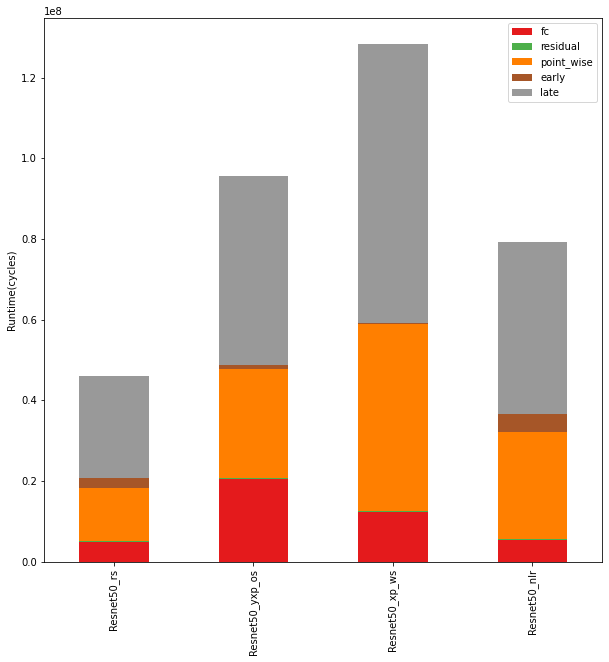

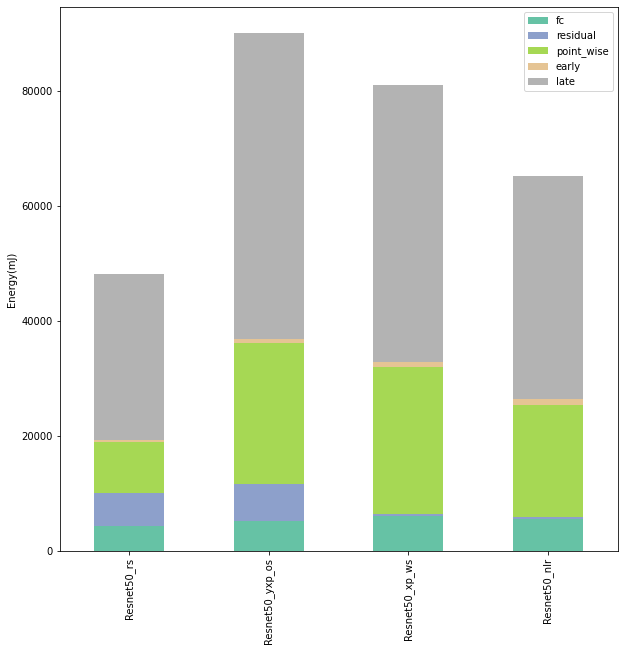

In [ ]:
runtimes = {}
energies = {}
for file in resnet_csv_files:
    with open(file,'r') as f:
        print(f'Filename: {file}')
        df = pd.read_csv(f)
        df = df.set_index(' Layer Number')
        df = df[[' Runtime (Cycles)',  ' Activity count-based Energy (nJ)']]
        fc = df.filter(like='FC', axis=0).sum(axis = 0)
        
        residual = df.filter(like='_Residual', axis=0).sum(axis = 0)
        
        point_wise = df.filter(regex='CONV._._1', axis=0).sum(axis = 0)
        
        early_layer = df.filter(regex='CONV1', axis=0).sum(axis = 0)
        
        late_layer = df.filter(regex='CONV._._[234]', axis=0).sum(axis = 0)
        
        layers = [fc,residual,point_wise,early_layer,late_layer]
        filename = file.split('/')[2].split('.')[0]
        runtimes[filename] = [x[0] for x in layers]  
        energies[filename] = [x[1]/10**6 for x in layers]  

        # print(fc.head(),fc.count())
        # print(residual.head(),residual.count())
        # print(point_wise.head(),point_wise.count())
        # print(early_layer.head(),early_layer.count())
        # print(late_layer.head(),late_layer.count())
        
        # print('\n\n\n\n\n\n')
print(runtimes)
pd.DataFrame(runtimes,index=['fc','residual','point_wise','early','late']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Runtime(cycles)',colormap='Set1')
pd.DataFrame(energies,index=['fc','residual','point_wise','early','late']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Energy(mJ)',colormap='Set2')

## Scratchpad code for ResNet

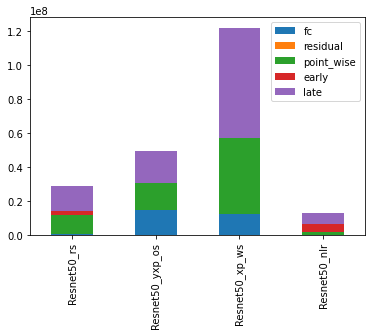

In [ ]:
pd.DataFrame(runtimes,index=['fc','residual','point_wise','early','late']).T.plot.bar(stacked=True)

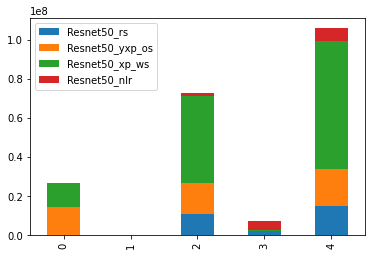

In [ ]:
pd.DataFrame(runtimes).plot.bar(stacked=True)

In [ ]:
pd.DataFrame(pd.concat([point_wise,residual, fc ,late_layer, early_layer]))

,0
Runtime (Cycles),1806352
Activity count-based Energy (nJ),19541
Runtime (Cycles),15500
Activity count-based Energy (nJ),335
Runtime (Cycles),24001
Activity count-based Energy (nJ),5521
Runtime (Cycles),6684960
Activity count-based Energy (nJ),38716
Runtime (Cycles),4562305
Activity count-based Energy (nJ),1093


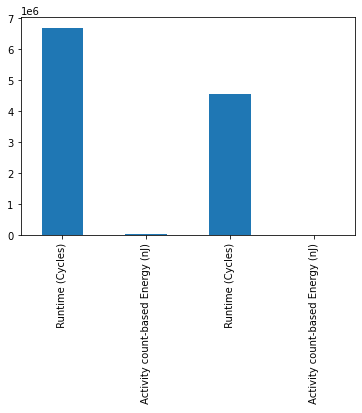

In [ ]:
pd.concat([late_layer, early_layer]).plot.bar(stacked=True)

In [ ]:
df[[' Layer Number',]

0                CONV1
1            CONV2_1_1
2            CONV2_1_2
3            CONV2_1_3
4     CONV2_1_Residual
            ...       
61           CONV5_3_1
62           CONV5_3_2
63           CONV5_3_3
64    CONV5_3_Residual
65              FC1000
Name:  Layer Number, Length: 66, dtype: object

In [ ]:
df.columns

Index(['Neural Network Name', ' Layer Number', ' NumPEs', ' Runtime (Cycles)',
       ' Activity count-based Energy (nJ)', ' Throughput (MACs/Cycle)',
       ' Throughput Per Energy (GMACs/s*J)', ' Area', ' Power',
       ' NoC BW (Elements/cycle)', ' Avg BW Req', ' Peak BW Req',
       ' Vector Width', '  L2 SRAM Size (Bytes)', ' L1 SRAM Size (Bytes)',
       ' Multicasting Factor (Weight)', ' Multicasting Factor (Input)',
       ' Num Total Input Pixels', ' Num Total Weight Pixels', ' Ops/J',
       ' Num MACs', ' PE power', ' L1 power', ' L2 power', ' NOC power',
       ' input l1 read', ' input l1 write', ' input l2 read',
       ' input l2 write', ' input reuse factor', 'filter l1 read',
       ' filter l1 write', ' filter l2 read', ' filter l2 write',
       ' filter reuse factor', 'output l1 read', ' output l1 write',
       ' output l2 read', ' output l2 write', ' output reuse factor',
       'Ingress Delay (Min)', ' Ingress Delay (Max)', ' Ingress Delay (Avg)',
       ' Egress

In [ ]:
df

,Neural Network Name,Layer Number,NumPEs,Runtime (Cycles),Activity count-based Energy (nJ),Throughput (MACs/Cycle),Throughput Per Energy (GMACs/s*J),Area,Power,NoC BW (Elements/cycle),Avg BW Req,Peak BW Req,Vector Width,L2 SRAM Size (Bytes),L1 SRAM Size (Bytes),Multicasting Factor (Weight),Multicasting Factor (Input),Num Total Input Pixels,Num Total Weight Pixels,Ops/J,Num MACs,PE power,L1 power,L2 power,NOC power,input l1 read,input l1 write,input l2 read,input l2 write,input reuse factor,filter l1 read,filter l1 write,filter l2 read,filter l2 write,filter reuse factor,output l1 read,output l1 write,output l2 read,output l2 write,output reuse factor,Ingress Delay (Min),Ingress Delay (Max),Ingress Delay (Avg),Egress Delay (Min),Egress Delay (Max),Egress Delay (Avg),Compute Delay (Min),Compute Delay (Min),Compute Delay (Avg),Avg number of utilized PEs,Arithmetic Intensity
0,Resnet50,CONV1,512,4562305,1093990000,24.5000,22.3951,24547400000000,192924000,32000000,4.77374,49,9,590,294,1,1,150528,9408,102173000,111776448,5632.36,565.248,4,192918000,111776448,21772947,21772947,150528,5.13373,111776448,6321,6321,9408,17683.30000,111776448,111776448,3041536,760384,1,1,1,1,1,1,1,6,6,6,3,5.25000
1,Resnet50,CONV2_1_1,512,200705,316780000,63.9997,202.0320,24547400000000,192923000,32000000,63.00030,128,9,258,6,1,1,200704,4096,40548800,12845056,5632.36,113.050,4,192918000,12845056,12640384,12640384,200704,1.01619,12845056,4033,4033,4096,3184.99000,12845056,12845056,200704,200704,1,1,1,1,1,1,1,1,1,1,64,1.01587
2,Resnet50,CONV2_1_2,512,186625,1331090000,575.9970,432.7240,24547400000000,192923000,32000000,196.00300,1152,9,2306,54,1,1,200704,36864,80757200,107495424,5632.36,113.050,4,192918000,107495424,36542592,36542592,200704,2.94165,107495424,36297,36297,36864,2961.55000,107495424,107495424,186624,186624,1,1,1,1,1,1,1,1,1,1,64,3.04762
3,Resnet50,CONV2_1_3,512,802817,1256990000,63.9999,50.9153,24547400000000,192923000,32000000,63.00010,128,9,258,6,1,1,200704,16384,40875700,51380224,5632.36,113.050,4,192918000,51380224,50561344,50561344,200704,1.01620,51380224,16129,16129,16384,3185.58000,51380224,51380224,802816,802816,1,1,1,1,1,1,1,1,1,1,64,1.01587
4,Resnet50,CONV2_1_Residual,512,3137,46513400,255.9180,5502.0400,24547400000000,192923000,32000000,255.08200,512,9,1534,6,1,1,802816,256,17259900,802816,5632.36,113.050,4,192918000,802816,799681,799681,802816,1.00392,802816,256,256,256,3136.00000,802816,802816,802816,799680,1,1,1,1,1,1,1,1,1,1,256,1.00392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Resnet50,CONV5_3_1,512,100353,1982400000,511.9950,258.2710,24547400000000,192923000,32000000,896.00500,1024,9,2050,6,1,1,100352,1048576,25918200,51380224,5632.36,113.050,4,192918000,51380224,51118592,51118592,100352,1.00512,51380224,38797312,38797312,1048576,1.32432,51380224,51380224,25088,100352,1,1,1,1,1,1,1,1,1,1,512,0.50000
62,Resnet50,CONV5_3_2,512,12801,903595000,4607.6400,5099.2300,24547400000000,192923000,32000000,2150.76000,9216,9,18434,54,1,1,25088,2359296,65275300,58982400,5632.36,113.050,4,192918000,58982400,25170432,25170432,25088,2.34332,58982400,2359296,2359296,2359296,25.00000,58982400,58982400,12800,12800,1,1,1,1,1,1,1,1,1,1,512,3.00000
63,Resnet50,CONV5_3_3,512,100353,1274310000,511.9950,401.7810,24547400000000,192923000,32000000,512.00500,1024,9,2050,6,1,1,25088,1048576,40319900,51380224,5632.36,113.050,4,192918000,51380224,50332160,50332160,25088,1.02082,51380224,1048576,1048576,1048576,49.00000,51380224,51380224,100352,100352,1,1,1,1,1,1,1,1,1,1,512,1.00000
64,Resnet50,CONV5_3_Residual,512,197,7251180,509.4010,70250.8000,24547400000000,192923000,32000000,898.61200,1024,9,3072,6,1,1,100352,2048,13839400,100352,5632.36,113.050,4,192918000,100352,100352,100352,100352,1.00000,100352,75776,75776,2048,1.32432,100352,100352,100352,100352,1,1,1,1,1,1,1,1,1,1,512,0.50000


In [ ]:
df.set_index(' Layer Number')

,Neural Network Name,NumPEs,Runtime (Cycles),Activity count-based Energy (nJ),Throughput (MACs/Cycle),Throughput Per Energy (GMACs/s*J),Area,Power,NoC BW (Elements/cycle),Avg BW Req,Peak BW Req,Vector Width,L2 SRAM Size (Bytes),L1 SRAM Size (Bytes),Multicasting Factor (Weight),Multicasting Factor (Input),Num Total Input Pixels,Num Total Weight Pixels,Ops/J,Num MACs,PE power,L1 power,L2 power,NOC power,input l1 read,input l1 write,input l2 read,input l2 write,input reuse factor,filter l1 read,filter l1 write,filter l2 read,filter l2 write,filter reuse factor,output l1 read,output l1 write,output l2 read,output l2 write,output reuse factor,Ingress Delay (Min),Ingress Delay (Max),Ingress Delay (Avg),Egress Delay (Min),Egress Delay (Max),Egress Delay (Avg),Compute Delay (Min),Compute Delay (Min),Compute Delay (Avg),Avg number of utilized PEs,Arithmetic Intensity
Layer Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CONV1,Resnet50,512,4562305,1093990000,24.5000,22.3951,24547400000000,192924000,32000000,4.77374,49,9,590,294,1,1,150528,9408,102173000,111776448,5632.36,565.248,4,192918000,111776448,21772947,21772947,150528,5.13373,111776448,6321,6321,9408,17683.30000,111776448,111776448,3041536,760384,1,1,1,1,1,1,1,6,6,6,3,5.25000
CONV2_1_1,Resnet50,512,200705,316780000,63.9997,202.0320,24547400000000,192923000,32000000,63.00030,128,9,258,6,1,1,200704,4096,40548800,12845056,5632.36,113.050,4,192918000,12845056,12640384,12640384,200704,1.01619,12845056,4033,4033,4096,3184.99000,12845056,12845056,200704,200704,1,1,1,1,1,1,1,1,1,1,64,1.01587
CONV2_1_2,Resnet50,512,186625,1331090000,575.9970,432.7240,24547400000000,192923000,32000000,196.00300,1152,9,2306,54,1,1,200704,36864,80757200,107495424,5632.36,113.050,4,192918000,107495424,36542592,36542592,200704,2.94165,107495424,36297,36297,36864,2961.55000,107495424,107495424,186624,186624,1,1,1,1,1,1,1,1,1,1,64,3.04762
CONV2_1_3,Resnet50,512,802817,1256990000,63.9999,50.9153,24547400000000,192923000,32000000,63.00010,128,9,258,6,1,1,200704,16384,40875700,51380224,5632.36,113.050,4,192918000,51380224,50561344,50561344,200704,1.01620,51380224,16129,16129,16384,3185.58000,51380224,51380224,802816,802816,1,1,1,1,1,1,1,1,1,1,64,1.01587
CONV2_1_Residual,Resnet50,512,3137,46513400,255.9180,5502.0400,24547400000000,192923000,32000000,255.08200,512,9,1534,6,1,1,802816,256,17259900,802816,5632.36,113.050,4,192918000,802816,799681,799681,802816,1.00392,802816,256,256,256,3136.00000,802816,802816,802816,799680,1,1,1,1,1,1,1,1,1,1,256,1.00392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CONV5_3_1,Resnet50,512,100353,1982400000,511.9950,258.2710,24547400000000,192923000,32000000,896.00500,1024,9,2050,6,1,1,100352,1048576,25918200,51380224,5632.36,113.050,4,192918000,51380224,51118592,51118592,100352,1.00512,51380224,38797312,38797312,1048576,1.32432,51380224,51380224,25088,100352,1,1,1,1,1,1,1,1,1,1,512,0.50000
CONV5_3_2,Resnet50,512,12801,903595000,4607.6400,5099.2300,24547400000000,192923000,32000000,2150.76000,9216,9,18434,54,1,1,25088,2359296,65275300,58982400,5632.36,113.050,4,192918000,58982400,25170432,25170432,25088,2.34332,58982400,2359296,2359296,2359296,25.00000,58982400,58982400,12800,12800,1,1,1,1,1,1,1,1,1,1,512,3.00000
CONV5_3_3,Resnet50,512,100353,1274310000,511.9950,401.7810,24547400000000,192923000,32000000,512.00500,1024,9,2050,6,1,1,25088,1048576,40319900,51380224,5632.36,113.050,4,192918000,51380224,50332160,50332160,25088,1.02082,51380224,1048576,1048576,1048576,49.00000,51380224,51380224,100352,100352,1,1,1,1,1,1,1,1,1,1,512,1.00000


In [ ]:
fully_connected = df.loc[df[' Layer Number'] == 'FC1000']

In [ ]:
df.set_index(' Layer Number').filter(like='FC', axis=0)

,Neural Network Name,NumPEs,Runtime (Cycles),Activity count-based Energy (nJ),Throughput (MACs/Cycle),Throughput Per Energy (GMACs/s*J),Area,Power,NoC BW (Elements/cycle),Avg BW Req,Peak BW Req,Vector Width,L2 SRAM Size (Bytes),L1 SRAM Size (Bytes),Multicasting Factor (Weight),Multicasting Factor (Input),Num Total Input Pixels,Num Total Weight Pixels,Ops/J,Num MACs,PE power,L1 power,L2 power,NOC power,input l1 read,input l1 write,input l2 read,input l2 write,input reuse factor,filter l1 read,filter l1 write,filter l2 read,filter l2 write,filter reuse factor,output l1 read,output l1 write,output l2 read,output l2 write,output reuse factor,Ingress Delay (Min),Ingress Delay (Max),Ingress Delay (Avg),Egress Delay (Min),Egress Delay (Max),Egress Delay (Avg),Compute Delay (Min),Compute Delay (Min),Compute Delay (Avg),Avg number of utilized PEs,Arithmetic Intensity
Layer Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FC1000,Resnet50,512,24001,5521280000,4181.16,757.28,24547400000000,192924000,32000000,7318.38,8362,9,100354,294,1,1,100352,100352000,18175500,100352000,5632.36,565.248,16,192918000,100352000,75289088,75289088,100352,1.33289,100352000,100352000,100352000,100352000,1.0,100352000,100352000,1000,4000,1,1,1,1,1,1,1,6,6,6,512,0.5


In [ ]:
x = df.filter(like='_Residual', axis=0)
x
x.loc[x[' Layer Number'] not in ]

,Runtime (Cycles),Activity count-based Energy (nJ)
Layer Number,,
CONV2_1_Residual,3137,46513400
CONV2_2_Residual,3137,46513400
CONV2_3_Residual,3137,46513400
CONV3_1_Residual,785,23325300
CONV3_1_Residual,785,23325300
CONV3_3_Residual,785,23325300
CONV3_4_Residual,785,23325300
CONV4_1_Residual,393,13521000
CONV4_2_Residual,393,13521000


In [ ]:
df.set_index(' Layer Number').filter(regex='CONV._._1', axis=0)[[' Runtime (Cycles)',  ' Activity count-based Energy (nJ)']]

,Runtime (Cycles),Activity count-based Energy (nJ)
Layer Number,,
CONV2_1_1,200705,316780000
CONV2_2_1,200705,1268030000
CONV2_3_1,200705,1268030000
CONV3_1_1,100353,641186000
CONV3_2_1,100353,631057000
CONV3_3_1,100353,631057000
CONV3_4_1,100353,631057000
CONV4_1_1,50177,637088000
CONV4_2_1,100353,1735250000


In [ ]:
df.filter(regex='CONV._._[234]', axis=0)[[' Runtime (Cycles)',  ' Activity count-based Energy (nJ)']]

,Runtime (Cycles),Activity count-based Energy (nJ)
Layer Number,,
CONV2_1_2,186625,1331090000
CONV2_1_3,802817,1256990000
CONV2_2_2,186625,1331090000
CONV2_2_3,802817,1256990000
CONV2_3_2,186625,1331090000
CONV2_3_3,802817,1256990000
CONV3_1_2,86529,1262400000
CONV3_1_3,401409,1256740000
CONV3_2_2,86529,1262400000


In [ ]:
df.filter(regex='CONV._._[234]', axis=0).sum(axis = 0)[1]/10**6

38716.855

## Scratchpad for VGG

In [ ]:
vgg_csv_files = glob.glob("**/VGG/*.csv")

In [ ]:
vgg_csv_files

['content/VGG/vgg16_yxp_os.csv',
 'content/VGG/vgg16_xp_ws.csv',
 'content/VGG/vgg16_nlr.csv',
 'content/VGG/vgg16_rs.csv']

In [ ]:
df.filter(regex='CONV([456789]|1[0-9])', axis=0)

,Runtime (Cycles),Activity count-based Energy (nJ)
Layer Number,,
CONV4,9388248,1.184600e+10
CONV5,4764716,1.428090e+10
CONV6,9531180,1.141830e+10
CONV7,9531180,1.686230e+10
CONV8,4621334,1.368780e+10
CONV9,9190934,1.061790e+10
CONV10,9190934,1.566550e+10
CONV11,2187786,1.135110e+10
CONV12,2187786,3.408010e+09


Filename: content/VGG/vgg16_yxp_os.csv
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    2.943407e+07
 Activity count-based Energy (nJ)    3.359842e+10
dtype: float64 2
 Runtime (Cycles)                    1.182189e+08
 Activity count-based Energy (nJ)    1.600440e+11
dtype: float64 2







Filename: content/VGG/vgg16_xp_ws.csv
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    1.038702e+07
 Activity count-based Energy (nJ)    2

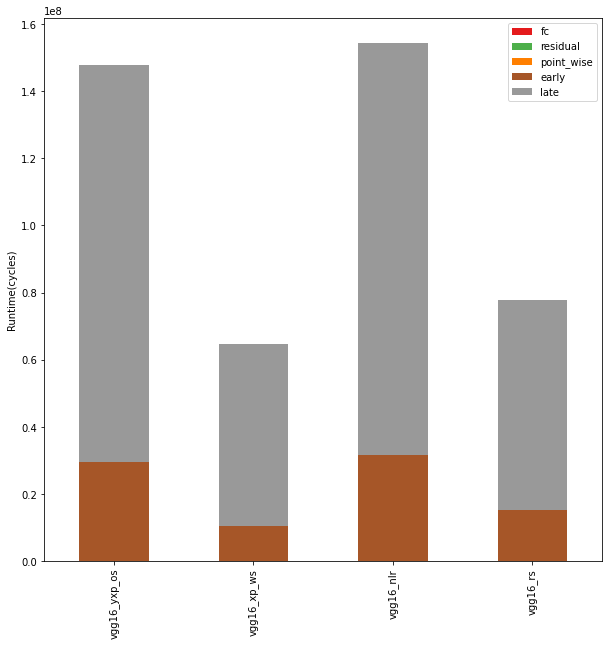

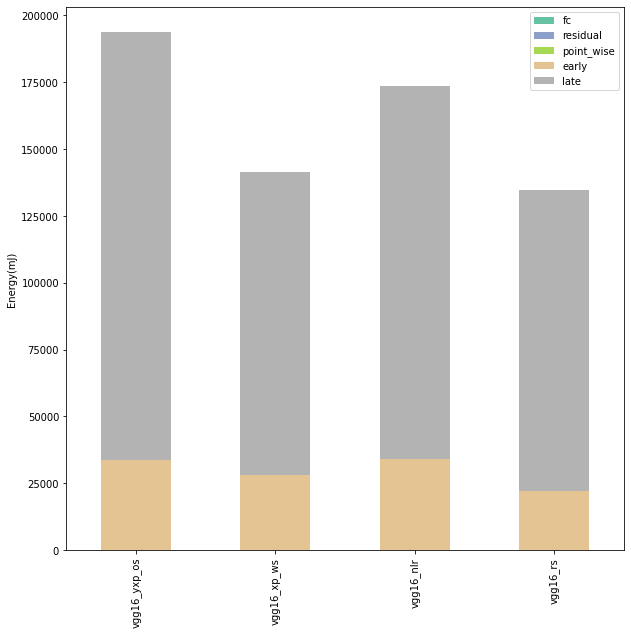

In [ ]:
runtimes = {}
energies = {}
for file in vgg_csv_files:
    with open(file,'r') as f:
        print(f'Filename: {file}')
        df = pd.read_csv(f)
        df = df.set_index(' Layer Number')
        # print(df.head())
        df = df[[' Runtime (Cycles)',  ' Activity count-based Energy (nJ)']]
        fc = df.filter(like='FC', axis=0).sum(axis = 0)
        
        residual = df.filter(like='_Residual', axis=0).sum(axis = 0)
        
        point_wise = df.filter(regex='CONV._._1', axis=0).sum(axis = 0)
        
        early_layer = df.filter(regex='CONV[1-3]$', axis=0).sum(axis=0)
        
        late_layer = df.filter(regex='CONV([456789]|1[0-9])', axis=0).sum(axis = 0)
        
        layers = [fc,residual,point_wise,early_layer,late_layer]
        filename = file.split('/')[2].split('.')[0]
        runtimes[filename] = [x[0] for x in layers]  
        energies[filename] = [x[1]/10**6 for x in layers]  

        print(fc.head(),fc.count())
        print(residual.head(),residual.count())
        print(point_wise.head(),point_wise.count())
        print(early_layer.head(),early_layer.count())
        print(late_layer.head(),late_layer.count())
        
        print('\n\n\n\n\n\n')
# print(runtimes)
pd.DataFrame(runtimes,index=['fc','residual','point_wise','early','late']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Runtime(cycles)',colormap='Set1')
pd.DataFrame(energies,index=['fc','residual','point_wise','early','late']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Energy(mJ)',colormap='Set2')

In [ ]:
df

,Runtime (Cycles),Activity count-based Energy (nJ)
Layer Number,,
CONV1,447431,2.942000e+08
CONV2,9867527,7.025470e+09
CONV3,4802520,1.468010e+10
CONV4,9388248,1.184600e+10
CONV5,4764716,1.428090e+10
CONV6,9531180,1.141830e+10
CONV7,9531180,1.686230e+10
CONV8,4621334,1.368780e+10
CONV9,9190934,1.061790e+10


## Squeezenet Analysis

In [ ]:
squeezenet_csv_files = glob.glob("**/Squeezenet/*.csv")

In [ ]:
squeezenet_csv_files

['content/Squeezenet/squeezenet1_0_xp_ws.csv',
 'content/Squeezenet/squeezenet1_0_rs.csv',
 'content/Squeezenet/squeezenet1_0_kcp_ws.csv',
 'content/Squeezenet/squeezenet1_0_ykp_os.csv']

Filename: content/Squeezenet/squeezenet1_0_xp_ws.csv
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    1.246738e+07
 Activity count-based Energy (nJ)    1.387753e+10
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2







Filename: content/Squeezenet/squeezenet1_0_rs.csv
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    0.0
 Activity count-based Energy (nJ)    0.0
dtype: float64 2
 Runtime (Cycles)                    3.100330e+06
 Activity count-based Energy (

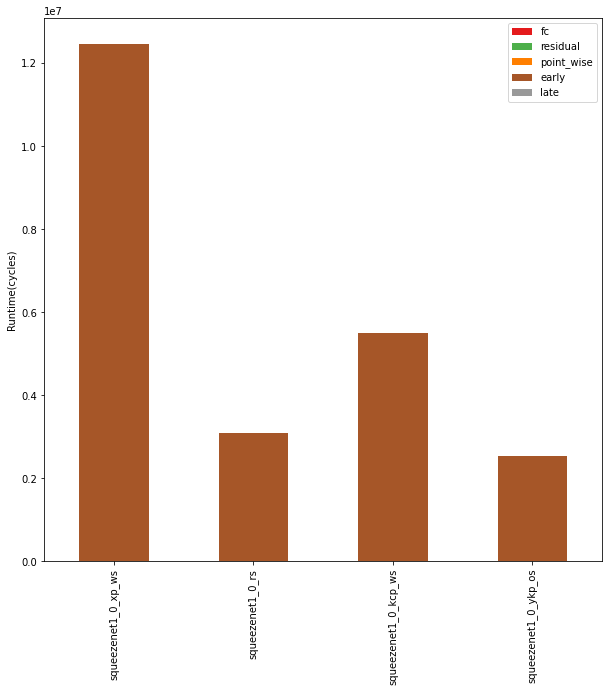

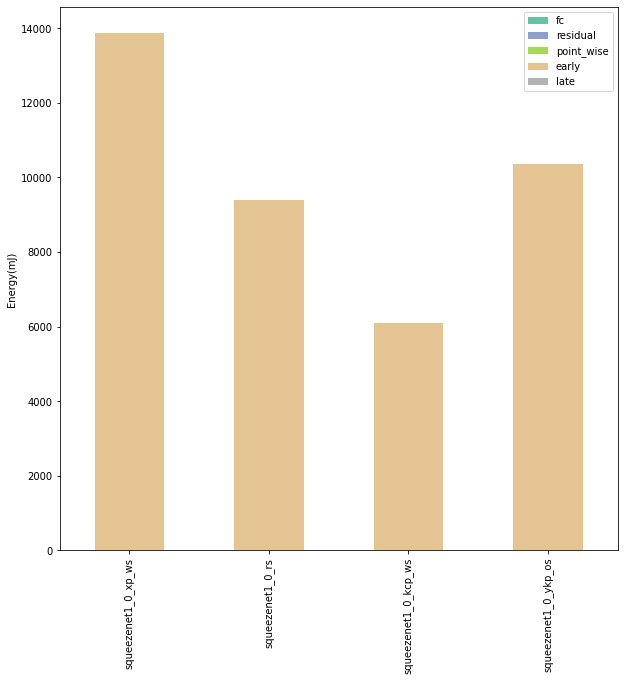

In [ ]:
runtimes = {}
energies = {}
for file in squeezenet_csv_files:
    with open(file,'r') as f:
        print(f'Filename: {file}')
        df = pd.read_csv(f)
        df = df.set_index(' Layer Number')
        # print(df.head())
        df = df[[' Runtime (Cycles)',  ' Activity count-based Energy (nJ)']]
        fc = df.filter(like='FC', axis=0).sum(axis = 0)
        
        residual = df.filter(like='_Residual', axis=0).sum(axis = 0)
        
        point_wise = df.filter(regex='CONV._._1', axis=0).sum(axis = 0)
        
        early_layer = df.filter(regex='\d?', axis=0).sum(axis = 0)
        
        late_layer = df.filter(regex='CONV._._[234]', axis=0).sum(axis = 0)
        
        layers = [fc,residual,point_wise,early_layer,late_layer]
        filename = file.split('/')[2].split('.')[0]
        runtimes[filename] = [x[0] for x in layers]  
        energies[filename] = [x[1]/10**6 for x in layers]  

        print(fc.head(),fc.count())
        print(residual.head(),residual.count())
        print(point_wise.head(),point_wise.count())
        print(early_layer.head(),early_layer.count())
        print(late_layer.head(),late_layer.count())
        
        print('\n\n\n\n\n\n')
# print(runtimes)
pd.DataFrame(runtimes,index=['fc','residual','point_wise','early','late']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Runtime(cycles)',colormap='Set1')
pd.DataFrame(energies,index=['fc','residual','point_wise','early','late']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Energy(mJ)',colormap='Set2')

In [ ]:
df

,Runtime (Cycles),Activity count-based Energy (nJ)
Layer Number,,
1,137347,4.099870e+08
2,41473,1.126320e+09
3,27649,8.579810e+07
4,26626,1.226990e+08
5,55297,2.769280e+08
6,27649,9.517760e+07
7,26626,1.226990e+08
8,110593,3.910950e+08
9,110593,3.045800e+08


## MobileNetV2 Analysis

In [ ]:
mbnet_csv_files = glob.glob("**/mbnet/*.csv")

In [ ]:
mbnet_csv_files

['content/mbnet/MobileNetV2_yxp_os.csv',
 'content/mbnet/MobileNetV2_xp_ws.csv',
 'content/mbnet/MobileNetV2_kcp_ws.csv']

Filename: content/mbnet/MobileNetV2_yxp_os.csv







Filename: content/mbnet/MobileNetV2_xp_ws.csv







Filename: content/mbnet/MobileNetV2_kcp_ws.csv









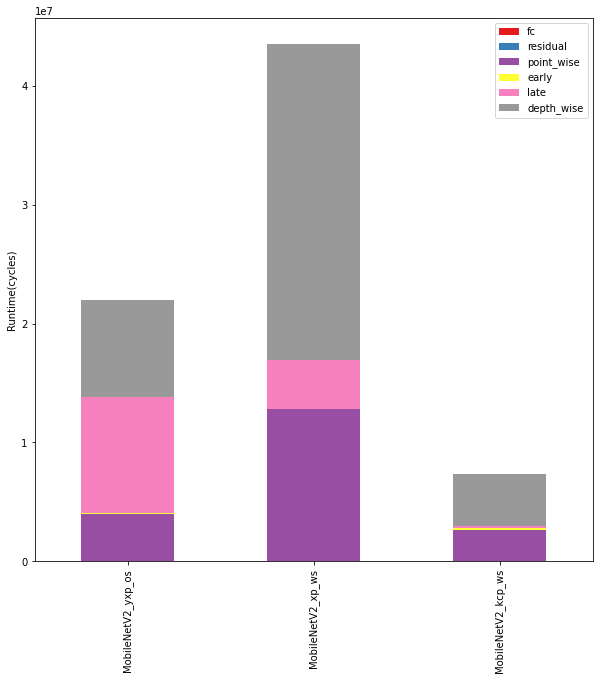

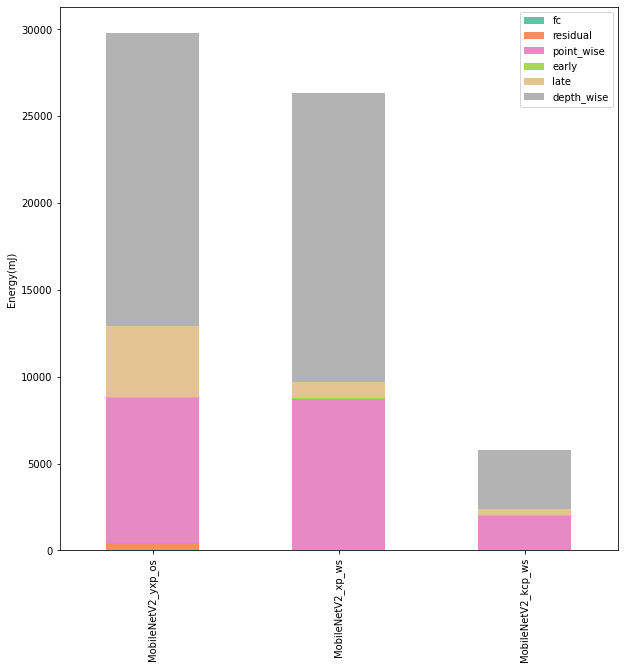

In [ ]:
runtimes = {}
energies = {}
for file in mbnet_csv_files:
    with open(file,'r') as f:
        print(f'Filename: {file}')
        df = pd.read_csv(f)
        df = df.set_index(' Layer Number')
        # print(df.head())
        df = df[[' Runtime (Cycles)',  ' Activity count-based Energy (nJ)']]
        # fc = df.filter(like='FC', axis=0).sum(axis = 0)
        
        residual = df.filter(like='_Residual', axis=0).sum(axis = 0)
        
        point_wise = df.filter(regex='Bottleneck._._1', axis=0).sum(axis = 0)
        
        early_layer = df.filter(regex='CONV1', axis=0).sum(axis = 0)
        
        late_layer = df.filter(regex='CONV[23]', axis=0).sum(axis = 0)

        depth_wise = df.filter(regex='Bottleneck._._\d',axis=0).sum(axis=0)
        
        layers = [fc,residual,point_wise,early_layer,late_layer,depth_wise]
        filename = file.split('/')[2].split('.')[0]
        runtimes[filename] = [x[0] for x in layers]  
        energies[filename] = [x[1]/10**6 for x in layers]  

        # print(fc.head(),fc.count())
        # print(residual.head(),residual.count())
        # print(point_wise.head(),point_wise.count())
        # print(early_layer.head(),early_layer.count())
        # print(late_layer.head(),late_layer.count())
        
        print('\n\n\n\n\n\n')
# print(runtimes)
pd.DataFrame(runtimes,index=['fc','residual','point_wise','early','late','depth_wise']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Runtime(cycles)',colormap='Set1')
pd.DataFrame(energies,index=['fc','residual','point_wise','early','late','depth_wise']).T.plot.bar(stacked=True,figsize=(10,10),ylabel='Energy(mJ)',colormap='Set2')

In [ ]:
df.filter(regex='Bottleneck._._\d',axis=0)

,Runtime (Cycles),Activity count-based Energy (nJ)
Layer Number,,
Bottleneck1_1_1,200705,75334200.0
Bottleneck1_1_2,12212,55937000.0
Bottleneck1_1_3,100353,60123900.0
Bottleneck2_1_1,602113,106242000.0
Bottleneck2_1_2,9134,73251400.0
Bottleneck2_1_3,301058,196154000.0
Bottleneck2_2_1,301058,367825000.0
Bottleneck2_2_2,5944,41035200.0
Bottleneck2_2_3,75266,64829800.0
